In [1]:
import skimage
skimage.__version__
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd

root_dir = 'covid-chestxray-dataset/'
image_dir = 'images/'

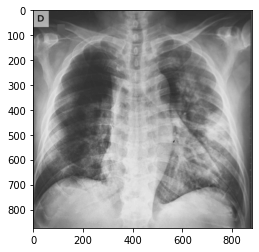

In [2]:
from skimage import io

df = pd.read_csv('clean_data.csv')
covid_df = df.loc[df['finding'] == 'COVID-19']

img_loc = root_dir + image_dir + covid_df.iloc[3]['filename']
img = io.imread(img_loc, as_gray=True)
plt.imshow(img, cmap=plt.cm.gray)

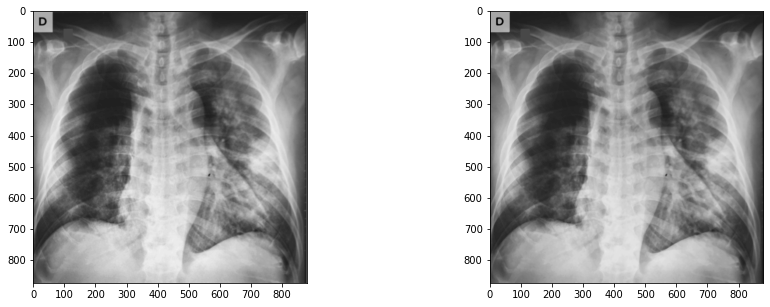

In [3]:
from skimage import filters

gaussian = filters.gaussian(img, sigma=1)
median = filters.median(img, selem=np.ones((5,5)))

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.imshow(gaussian, cmap=plt.cm.gray)
ax1.imshow(median, cmap=plt.cm.gray)

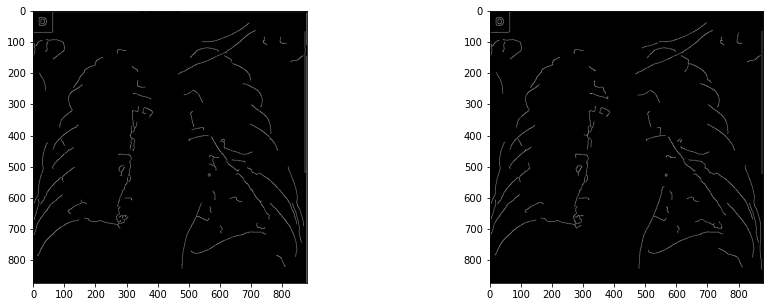

In [64]:
from skimage import feature
edges1 = feature.canny(gaussian, sigma=2)
edges2 = feature.canny(median, sigma=2)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.imshow(edges1, cmap=plt.cm.gray)
ax1.imshow(edges2, cmap=plt.cm.gray)

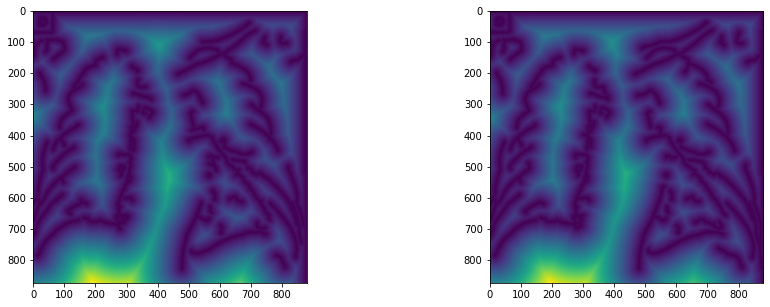

In [66]:
from scipy.ndimage import distance_transform_edt
dt1 = distance_transform_edt(~edges1)
dt2 = distance_transform_edt(~edges2)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.imshow(dt1)
ax1.imshow(dt2)

In [72]:
local_max = feature.peak_local_max(dt1, min_distance=1)
local_max

array([[544, 438],
       [524, 437],
       [552, 435],
       ...,
       [374, 327],
       [265, 323],
       [677, 274]])

In [77]:
from skimage import measure

markers = measure.label(local_max)
len(markers)

2523

874

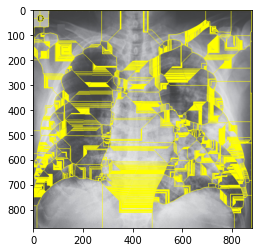

In [81]:
from skimage import morphology, segmentation

labels = segmentation.watershed(-dt1)
plt.imshow(segmentation.mark_boundaries(img, labels))
len(labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


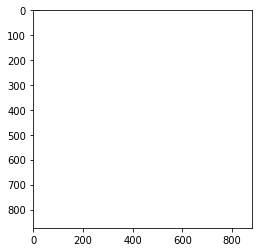

In [82]:
from skimage import color
plt.imshow(color.label2rgb(labels, image=img, kind='avg', bg_label=1), cmap='gray')